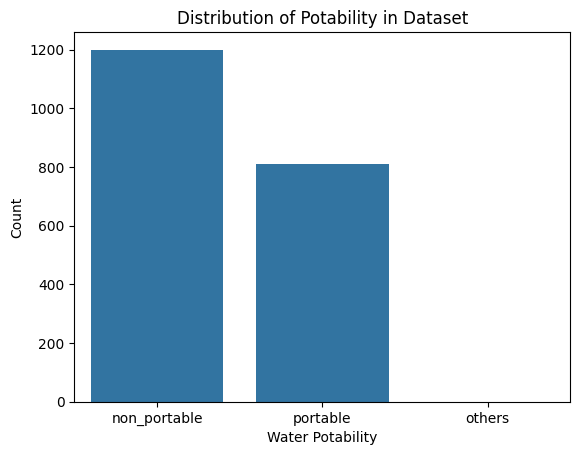

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload dataset after reset
df = pd.read_csv('cleaned_data.csv')

year_categories = {
    "non_portable": 0,
    "portable": 0,
    "others": 0
}

for potability in df['Potability']:
    if potability == 0:
        year_categories['non_portable'] += 1
    elif potability == 1:
        year_categories['portable'] += 1
    else:
        year_categories['others'] += 1

# Plot the data
sns.barplot(x=list(year_categories.keys()), y=list(year_categories.values()))
plt.xlabel("Water Potability")
plt.ylabel("Count")
plt.title("Distribution of Potability in Dataset")
plt.show()


In [120]:
from sklearn.preprocessing import MinMaxScaler
normalised_df = df.copy()
scaler = MinMaxScaler()
normalised_df.loc[:, normalised_df.columns != 'Potability'] = scaler.fit_transform(normalised_df.loc[:, normalised_df.columns != 'Potability'])
normalised_df.to_csv("normalised_water.csv", index=False)
normalised_df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.657339,0.610596,0.487464,0.618012,0.610340,0.355847,0.729571,0.892579,0.655278,0
1,0.755799,0.401691,0.396713,0.427728,0.386656,0.433213,0.346753,0.097623,0.524764,0
2,0.310372,0.446972,0.638669,0.553298,0.465807,0.173575,0.170960,0.364221,0.167571,0
3,0.899483,0.822179,0.638692,0.549341,0.786305,0.180584,0.470946,0.709517,0.194273,0
4,0.697853,0.541456,0.299952,0.178215,0.353997,0.600952,0.391586,0.455884,0.601689,0


In [121]:
import numpy as np

normalised_df['organic_carbon_ph'] = np.cov(normalised_df['Organic_carbon'], normalised_df['ph'])[0,1]
normalised_df['chloramines_hardness'] = np.cov(normalised_df['Chloramines'], normalised_df['Hardness'])[0,1]
normalised_df['trihalomethanes_solids'] = np.cov(normalised_df['Trihalomethanes'], normalised_df['Solids'])[0,1]
normalised_df.to_csv("features_water.csv", index=False)
normalised_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,organic_carbon_ph,chloramines_hardness,trihalomethanes_solids
0,0.657339,0.610596,0.487464,0.618012,0.610340,0.355847,0.729571,0.892579,0.655278,0,0.000907,-0.000893,-0.000615
1,0.755799,0.401691,0.396713,0.427728,0.386656,0.433213,0.346753,0.097623,0.524764,0,0.000907,-0.000893,-0.000615
2,0.310372,0.446972,0.638669,0.553298,0.465807,0.173575,0.170960,0.364221,0.167571,0,0.000907,-0.000893,-0.000615
3,0.899483,0.822179,0.638692,0.549341,0.786305,0.180584,0.470946,0.709517,0.194273,0,0.000907,-0.000893,-0.000615
4,0.697853,0.541456,0.299952,0.178215,0.353997,0.600952,0.391586,0.455884,0.601689,0,0.000907,-0.000893,-0.000615


In [122]:
features_concrete = pd.read_csv("features_water.csv")
sf_df = features_concrete.copy()
features_columns = ['ph', "Solids", "Chloramines", "Turbidity", "Potability", "organic_carbon_ph", "chloramines_hardness", "trihalomethanes_solids"]
columns_to_drop = [i for i in sf_df.columns if i not in features_columns]
sf_df.drop(columns=columns_to_drop, inplace=True)
sf_df.to_csv("selected_features_water.csv", index=False)
sf_df.head()

,ph,Solids,Chloramines,Turbidity,Potability,organic_carbon_ph,chloramines_hardness,trihalomethanes_solids
0,0.657339,0.487464,0.618012,0.655278,0,0.000907,-0.000893,-0.000615
1,0.755799,0.396713,0.427728,0.524764,0,0.000907,-0.000893,-0.000615
2,0.310372,0.638669,0.553298,0.167571,0,0.000907,-0.000893,-0.000615
3,0.899483,0.638692,0.549341,0.194273,0,0.000907,-0.000893,-0.000615
4,0.697853,0.299952,0.178215,0.601689,0,0.000907,-0.000893,-0.000615


In [123]:
features_columns = ['ph', "Solids", "Chloramines", "Turbidity", "Potability"]
columns_to_drop = [i for i in df.columns if i not in features_columns]
df.drop(columns=columns_to_drop, inplace=True)
df.to_csv("selected_converted_water.csv", index=False)
df.head()

,ph,Solids,Chloramines,Turbidity,Potability
0,8.316766,22018.417441,8.059332,4.628771,0
1,9.092223,17978.986339,6.546600,4.075075,0
2,5.584087,28748.687739,7.544869,2.559708,0
3,10.223862,28749.716544,7.513408,2.672989,0
4,8.635849,13672.091764,4.563009,4.401425,0


In [124]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [125]:
# Load dataset
df = pd.read_csv("cleaned_data.csv")

# Define features and target variable
feature_cols = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]
X = df[feature_cols]
y = df["Potability"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Model 1 - Without Normalisation Accuracy:", accuracy * 100, "%")


Model 1 - Without Normalisation Accuracy: 61.75496688741722 %


In [126]:
# Load dataset
df = pd.read_csv("normalised_water.csv")

# Define features and target variable
feature_cols = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]
X = df[feature_cols]
y = df["Potability"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Model 2 - With Normalisation Accuracy:", accuracy * 100, "%")


Model 2 - With Normalisation Accuracy: 61.920529801324506 %


In [127]:
# Load dataset
df = pd.read_csv("features_water.csv")

# Define features and target variable
feature_cols = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity",
                "organic_carbon_ph", "chloramines_hardness", "trihalomethanes_solids"]
X = df[feature_cols]
y = df["Potability"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Model 3 - With Normalisation & Composite Features Accuracy:", accuracy * 100, "%")


Model 3 - With Normalisation & Composite Features Accuracy: 62.086092715231786 %


In [128]:
# Load dataset
df = pd.read_csv("selected_features_water.csv")

# Define features and target variable
feature_cols = ["ph", "Solids", "Chloramines", "Turbidity", "organic_carbon_ph", "chloramines_hardness", "trihalomethanes_solids"]
X = df[feature_cols]
y = df["Potability"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Model 4 - Selected Normalised & Composite Features Accuracy:", accuracy * 100, "%")


Model 4 - Selected Normalised & Composite Features Accuracy: 58.27814569536424 %


In [129]:
# Load dataset
df = pd.read_csv("selected_converted_water.csv")

# Define features and target variable
feature_cols = ["ph", "Solids", "Chloramines", "Turbidity"]
X = df[feature_cols]
y = df["Potability"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Model 5 - Selected Non-Normalised & Non-Composite Features Accuracy:", accuracy * 100, "%")


Model 5 - Selected Non-Normalised & Non-Composite Features Accuracy: 58.443708609271525 %
